In [2]:
# Run once
%cd ..
%load_ext autoreload
%autoreload 2

/Users/lena/modconn/harvard_cs282_ptg


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from style import bold, plot_sims
from postprocess import _load_config

In [14]:
names = ['heloc', 'german', 'adult', 'default', 'gmsc']
random_source = 'rs'

directories = []
for name in names:
    config = _load_config('train_params.json', name)
    optim = 'adam'
    epochs = config[optim]['epochs']
    lr = config[optim]['lr']
    batch_size = config[optim]['batch_size']
    dropout = config[optim]['dropout']
    directory = f'models/{name}/{random_source}/{optim}_epochs{epochs}_lr{lr}_batch{batch_size}_dropout{dropout}'
    directories.append(directory)
    print(bold(f"{name.title()} Directory:"), directory)

Heloc Directory: models/heloc/rs/adam_epochs20_lr0.0004_batch32_dropout0
German Directory: models/german/rs/adam_epochs100_lr0.004_batch32_dropout0
Adult Directory: models/adult/rs/adam_epochs40_lr0.004_batch128_dropout0
Default Directory: models/default/rs/adam_epochs10_lr0.0001_batch128_dropout0
Gmsc Directory: models/gmsc/rs/adam_epochs20_lr0.0004_batch32_dropout0


In [15]:
methods = ['average', 'majority', 'perturb', 'mode connect', 'combined']
metric_names = {
    'cdc': 'Consistent Direction of Contribution',
    'ssa': 'Signed-Set Agreement',
    'sa': 'Sign Agreement',
}
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:5]
exp = 'gradients'
k = 5

# Saliency

### SA

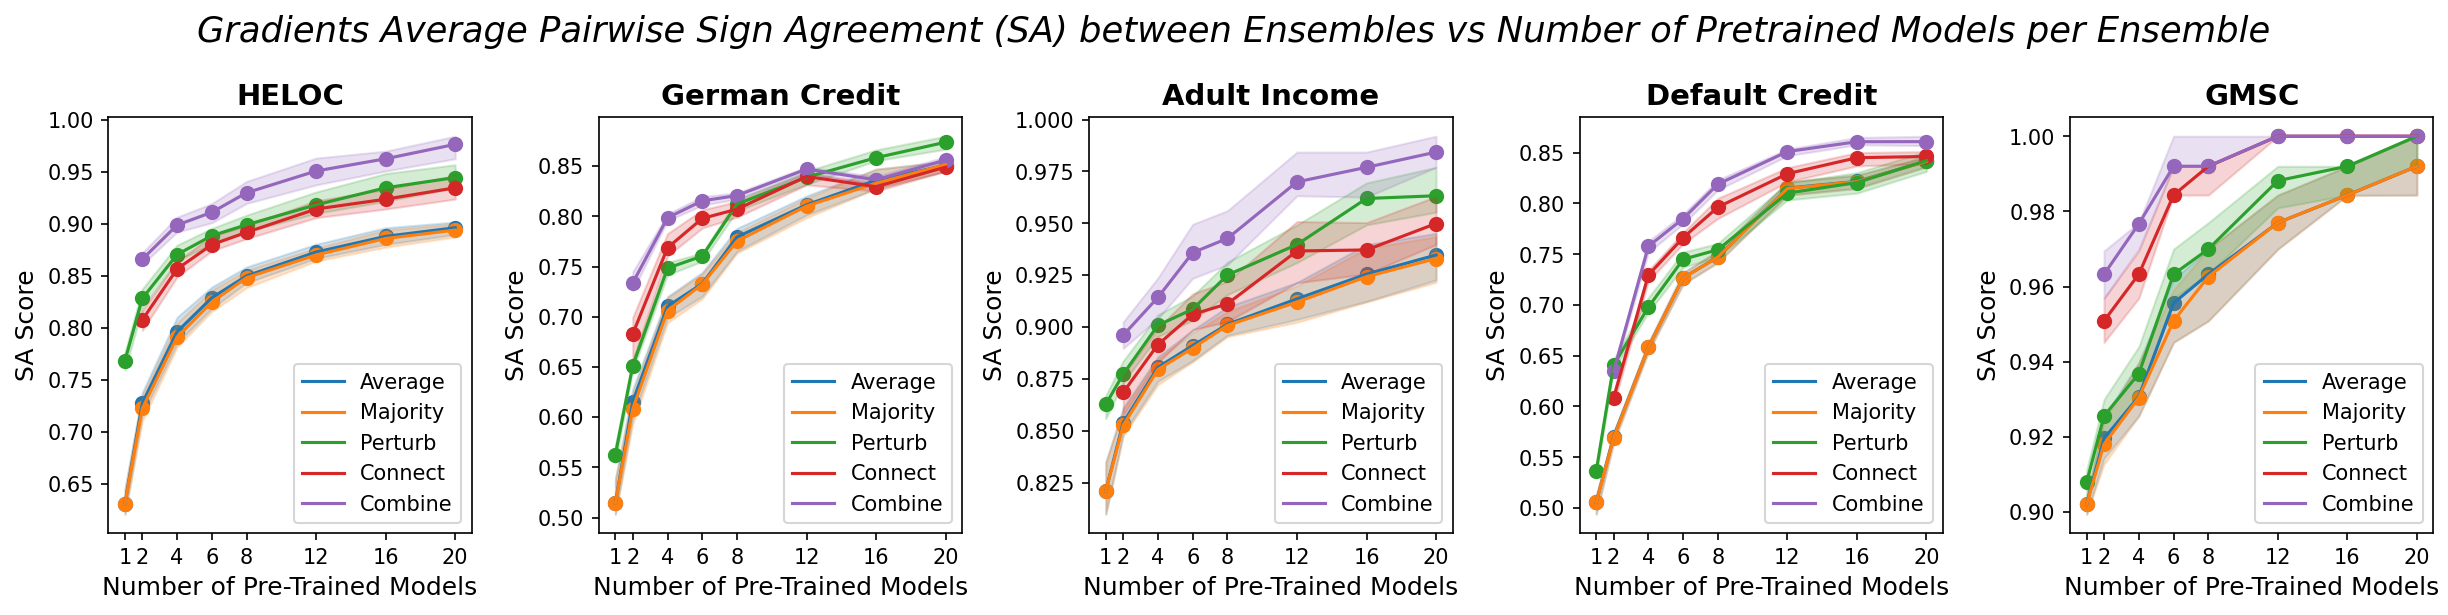

In [35]:
exp = 'gradients'
metric = 'sa'
k = 5
ensemble_sizes = [[1, 2, 4, 6, 8, 12, 16, 20]]*5
plot_sims(names, directories, ensemble_sizes, k, exp, metric, methods, colors)

In [32]:
exp = 'gradients'
metric = 'sa'
ensemble_sizes = [[1, 2, 4, 6, 8, 12, 16, 20],
                  [1, 2, 4, 6, 8, 10, 12],
                  [1, 2, 4, 6, 8, 12, 16, 20],
                  [1, 2, 4, 6, 8, 10, 12],#, 16, 20],
                  [1, 2, 4, 6, 8, 12, 16, 20]]

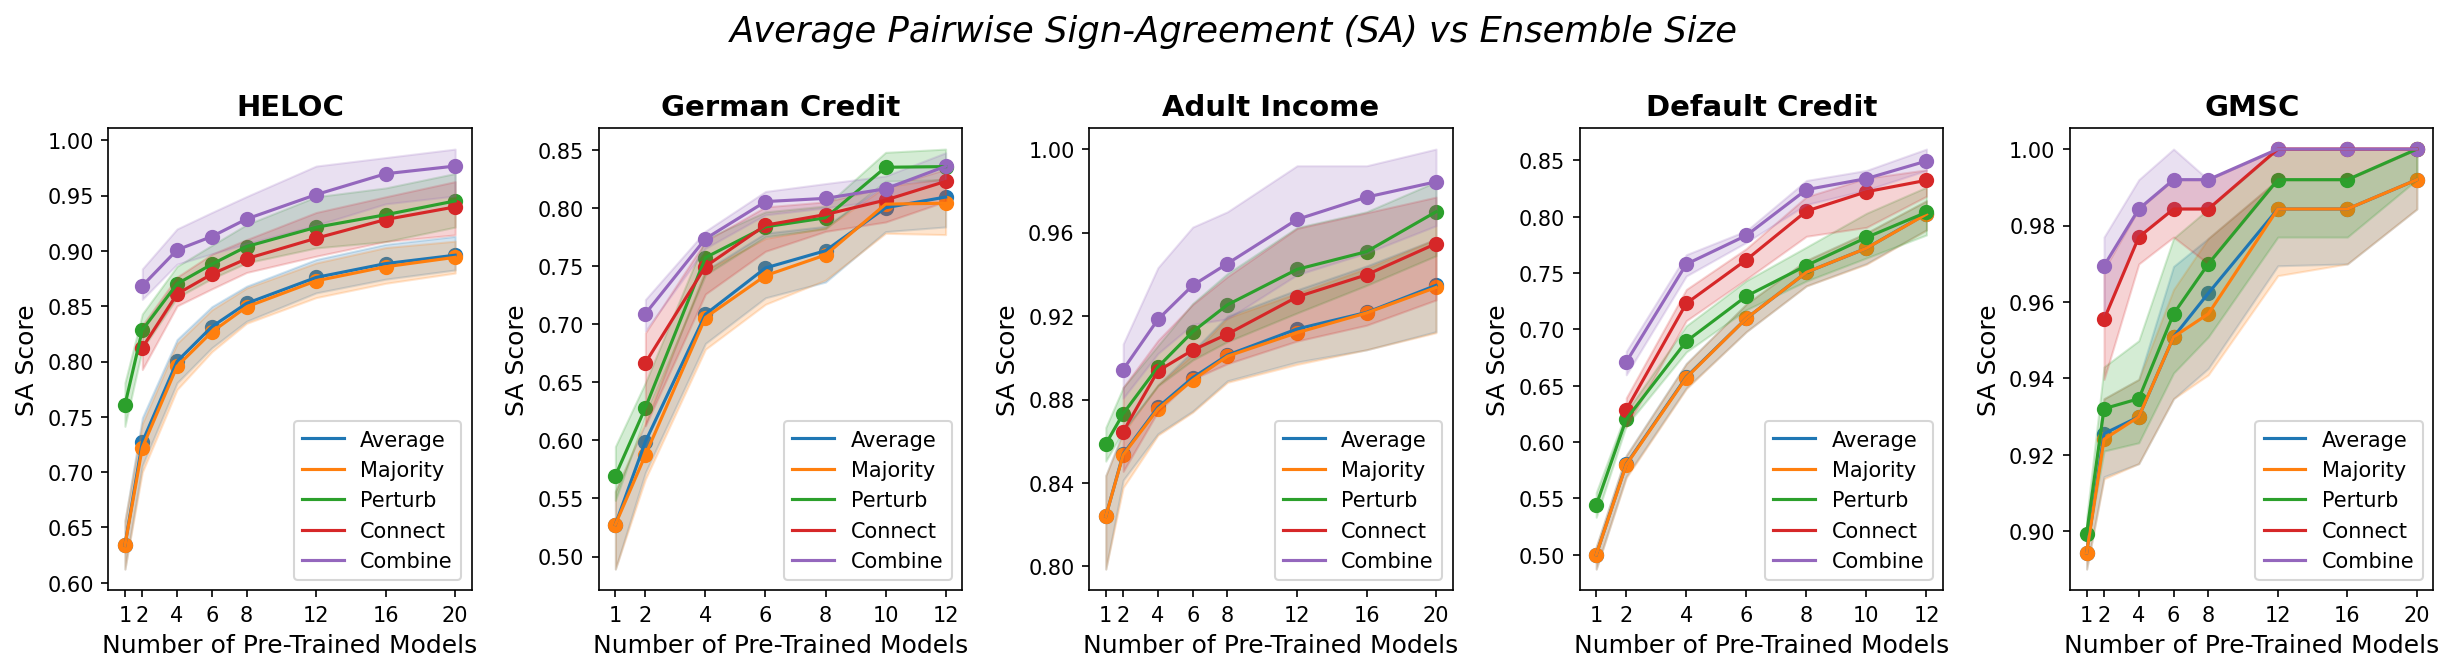

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=len(names), figsize=(len(names)*4, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)
method_names = ['Average', 'Majority', 'Perturb', 'Connect', 'Combine']
for i, name in enumerate(names):
    similarities = np.load(f'{directories[i]}/top{k}_{metric}_{exp}.npy')[:, :len(ensemble_sizes[i]), :]
    for j, method in enumerate(methods):
        q = np.quantile(similarities[j], [0.4, 0.5, 0.6], axis=1)
        ax[i].plot(ensemble_sizes[i], q[1], label=method_names[j], color=colors[j])
        ax[i].scatter(ensemble_sizes[i], q[1], s=40, color=colors[j])
        ax[i].fill_between(ensemble_sizes[i], q[0], q[2], alpha=0.2, color=colors[j])
        # x ticks
        ax[i].set_xticks(ensemble_sizes[i])
        if name == 'adult':
            ax[i].set_yticks(np.arange(0.8, 1.01, 0.04))
        ax[i].set_xlabel('Number of Pre-Trained Models', fontsize=12)
        name_title = name.title() if name not in ['heloc', 'gmsc'] else name.upper()
        name_title = name_title + ' Credit' if name in ['german', 'default'] else name_title
        name_title = name_title + ' Income' if name == 'adult' else name_title
        ax[i].set_title(name_title, fontsize=14, fontweight='bold')
        ax[i].legend()
        ax[i].set_ylabel('SA Score', fontsize=12)
title = 'Average Pairwise Sign-Agreement (SA) vs Ensemble Size'
plt.suptitle(title, fontstyle='italic', fontsize=17, y=1.07)
plt.show()

### SSA

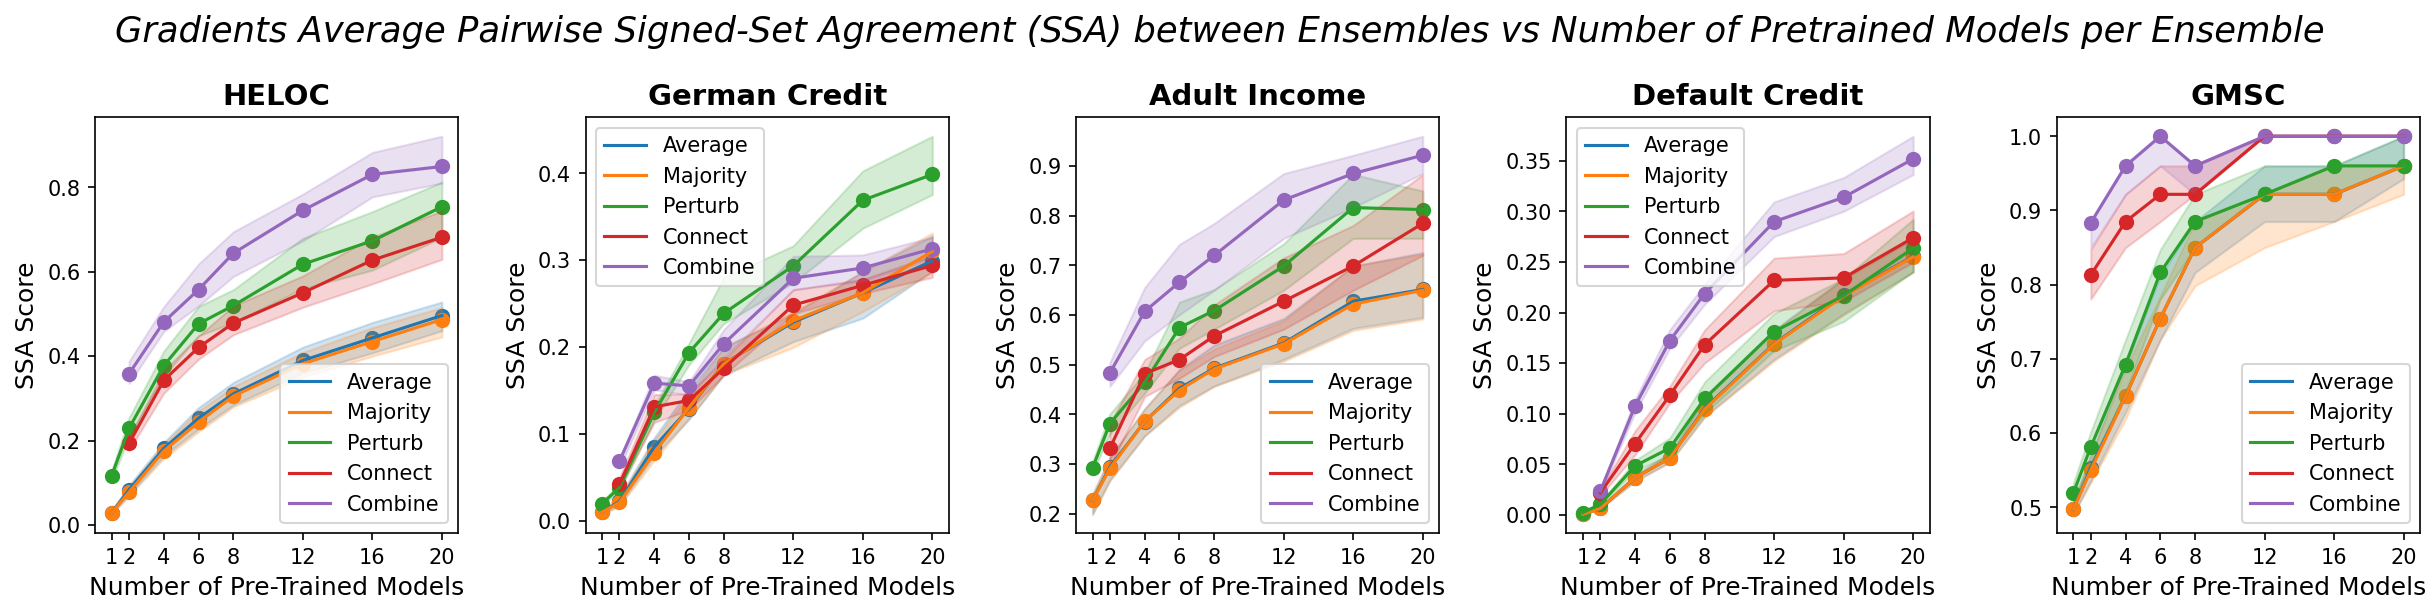

In [37]:
exp = 'gradients'
metric = 'ssa'
k = 5
ensemble_sizes = [[1, 2, 4, 6, 8, 12, 16, 20]]*5
plot_sims(names, directories, ensemble_sizes, k, exp, metric, methods, colors)

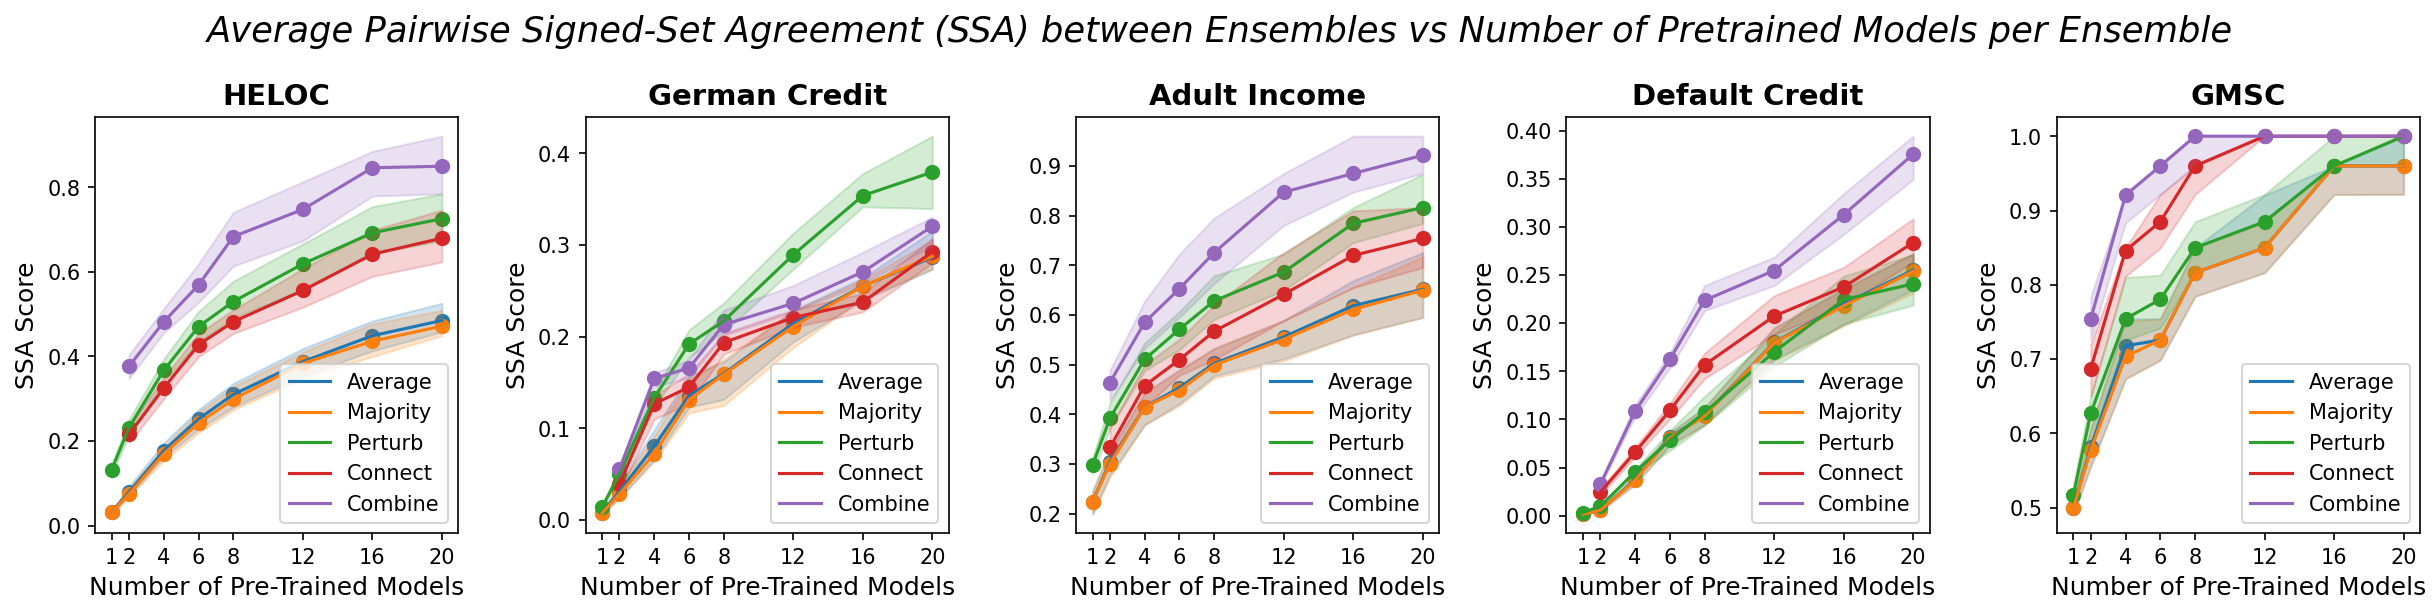

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=len(names), figsize=(len(names)*4, 3.6), dpi=150)
plt.subplots_adjust(wspace=0.35)
method_names = ['Average', 'Majority', 'Perturb', 'Connect', 'Combine']
for i, name in enumerate(names):
    similarities = np.load(f'{directories[i]}/top{k}_{metric}_{exp}.npy')[:, :len(ensemble_sizes[i]), :]
    for j, method in enumerate(methods):
        q = np.quantile(similarities[j], [0.45, 0.5, 0.55], axis=1)
        ax[i].plot(ensemble_sizes[i], q[1], label=method_names[j], color=colors[j])
        ax[i].scatter(ensemble_sizes[i], q[1], s=40, color=colors[j])
        ax[i].fill_between(ensemble_sizes[i], q[0], q[2], alpha=0.2, color=colors[j])
        # x ticks
        ax[i].set_xticks(ensemble_sizes[i])
        #if name == 'adult':
            #ax[i].set_yticks(np.arange(0.8, 1.01, 0.04))x
        ax[i].set_xlabel('Number of Pre-Trained Models', fontsize=12)
        name_title = name.title() if name not in ['heloc', 'gmsc'] else name.upper()
        name_title = name_title + ' Credit' if name in ['german', 'default'] else name_title
        name_title = name_title + ' Income' if name == 'adult' else name_title
        ax[i].set_title(name_title, fontsize=14, fontweight='bold')
        ax[i].legend(loc='lower right')
        ax[i].set_ylabel('SSA Score', fontsize=12)
title = 'Average Pairwise Signed-Set Agreement (SSA) between Ensembles vs Number of Pretrained Models per Ensemble'
plt.suptitle(title, fontstyle='italic', fontsize=17, y=1.07)
plt.show()

### CDC

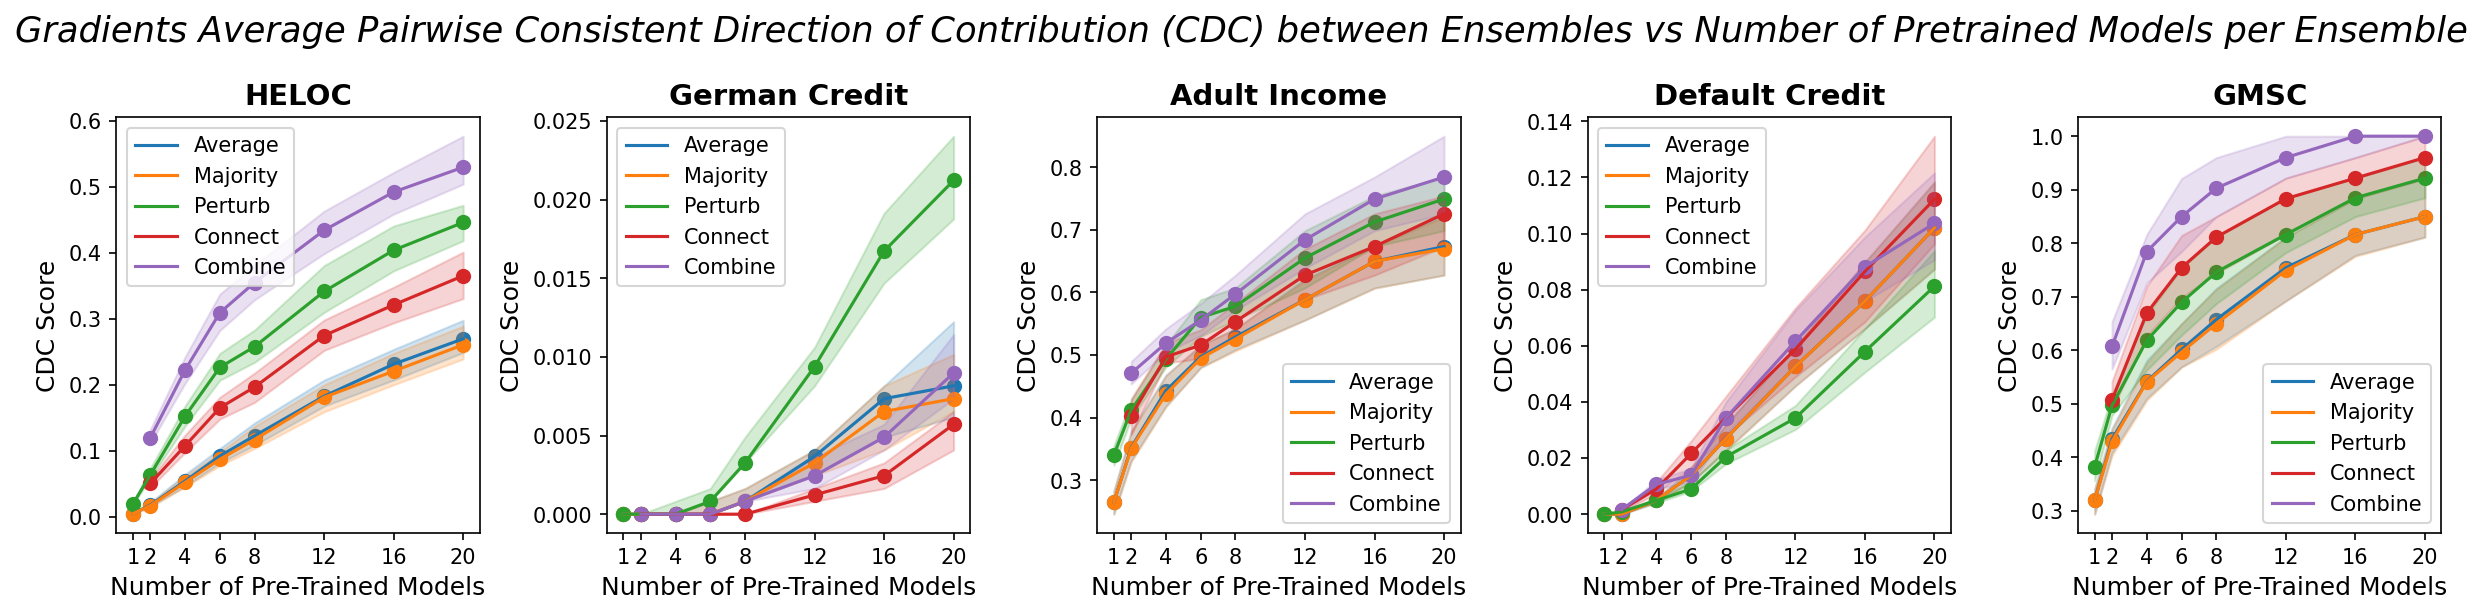

In [36]:
exp = 'gradients'
metric = 'cdc'
ks = [23, 70, 6, 90, 10]
ensemble_sizes = [[1, 2, 4, 6, 8, 12, 16, 20]]*5
plot_sims(names, directories, ensemble_sizes, ks, exp, metric, methods, colors)

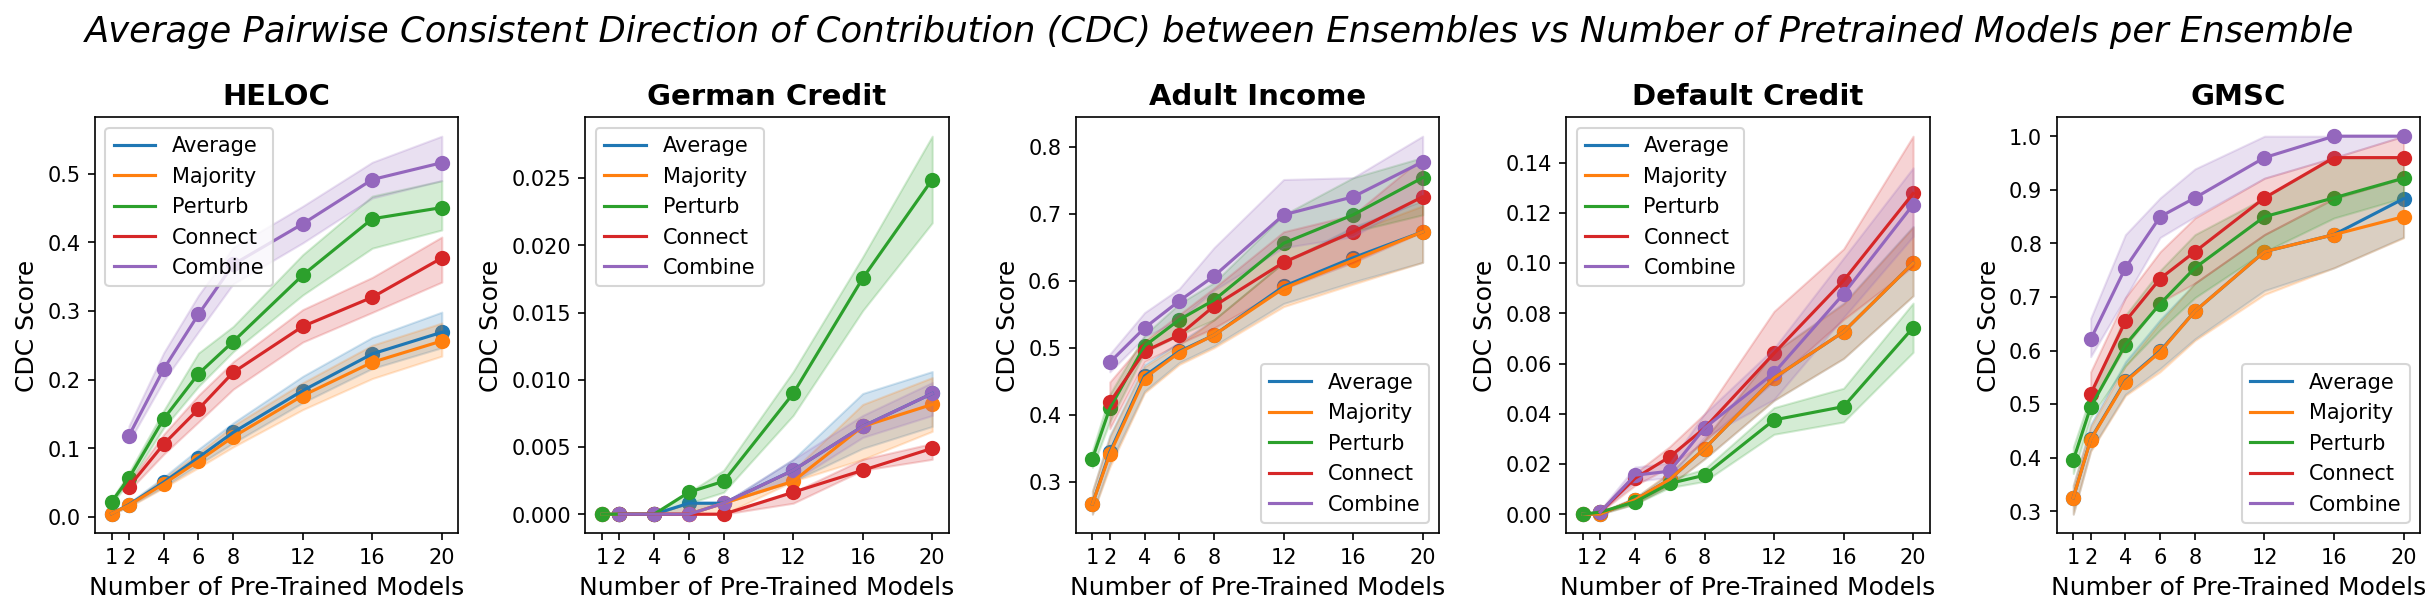

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=len(names), figsize=(len(names)*4, 3.6), dpi=150)
plt.subplots_adjust(wspace=0.35)
method_names = ['Average', 'Majority', 'Perturb', 'Connect', 'Combine']
for i, name in enumerate(names):
    k = ks[i]
    similarities = np.load(f'{directories[i]}/top{k}_{metric}_{exp}.npy')[:, :len(ensemble_sizes[i]), :]
    for j, method in enumerate(methods):
        q = np.quantile(similarities[j], [0.45, 0.5, 0.55], axis=1)
        ax[i].plot(ensemble_sizes[i], q[1], label=method_names[j], color=colors[j])
        ax[i].scatter(ensemble_sizes[i], q[1], s=40, color=colors[j])
        ax[i].fill_between(ensemble_sizes[i], q[0], q[2], alpha=0.2, color=colors[j])
        ax[i].set_xticks(ensemble_sizes[i])
        ax[i].set_xlabel('Number of Pre-Trained Models', fontsize=12)
        name_title = name.title() if name not in ['heloc', 'gmsc'] else name.upper()
        name_title = name_title + ' Credit' if name in ['german', 'default'] else name_title
        name_title = name_title + ' Income' if name == 'adult' else name_title
        ax[i].set_title(name_title, fontsize=14, fontweight='bold')
        ax[i].legend()
        ax[i].set_ylabel(f'{metric.upper()} Score', fontsize=12)
title = f'Average Pairwise {metric_names[metric]} ({metric.upper()}) between Ensembles vs Number of Pretrained Models per Ensemble'
plt.suptitle(title, fontstyle='italic', fontsize=17, y=1.07)
plt.show()

# Smoothgrad

### SA

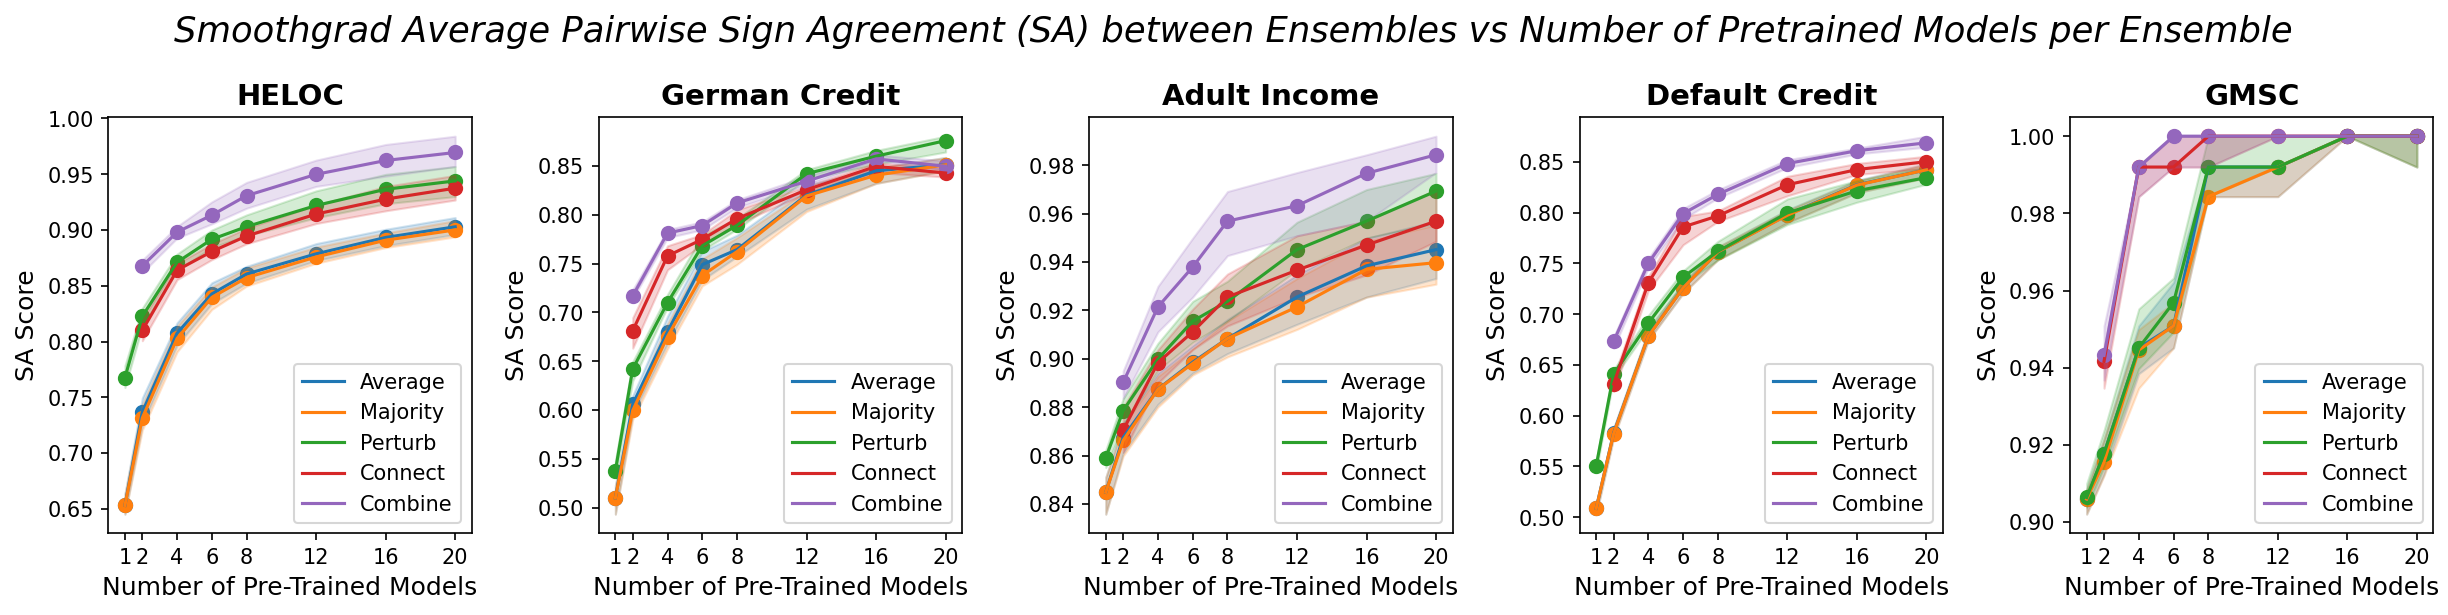

In [21]:
exp = 'smoothgrad'
metric = 'sa'
k = 5
ensemble_sizes = [[1, 2, 4, 6, 8, 12, 16, 20]]*5
plot_sims(names, directories, ensemble_sizes, k, exp, metric, methods, colors)

### SSA

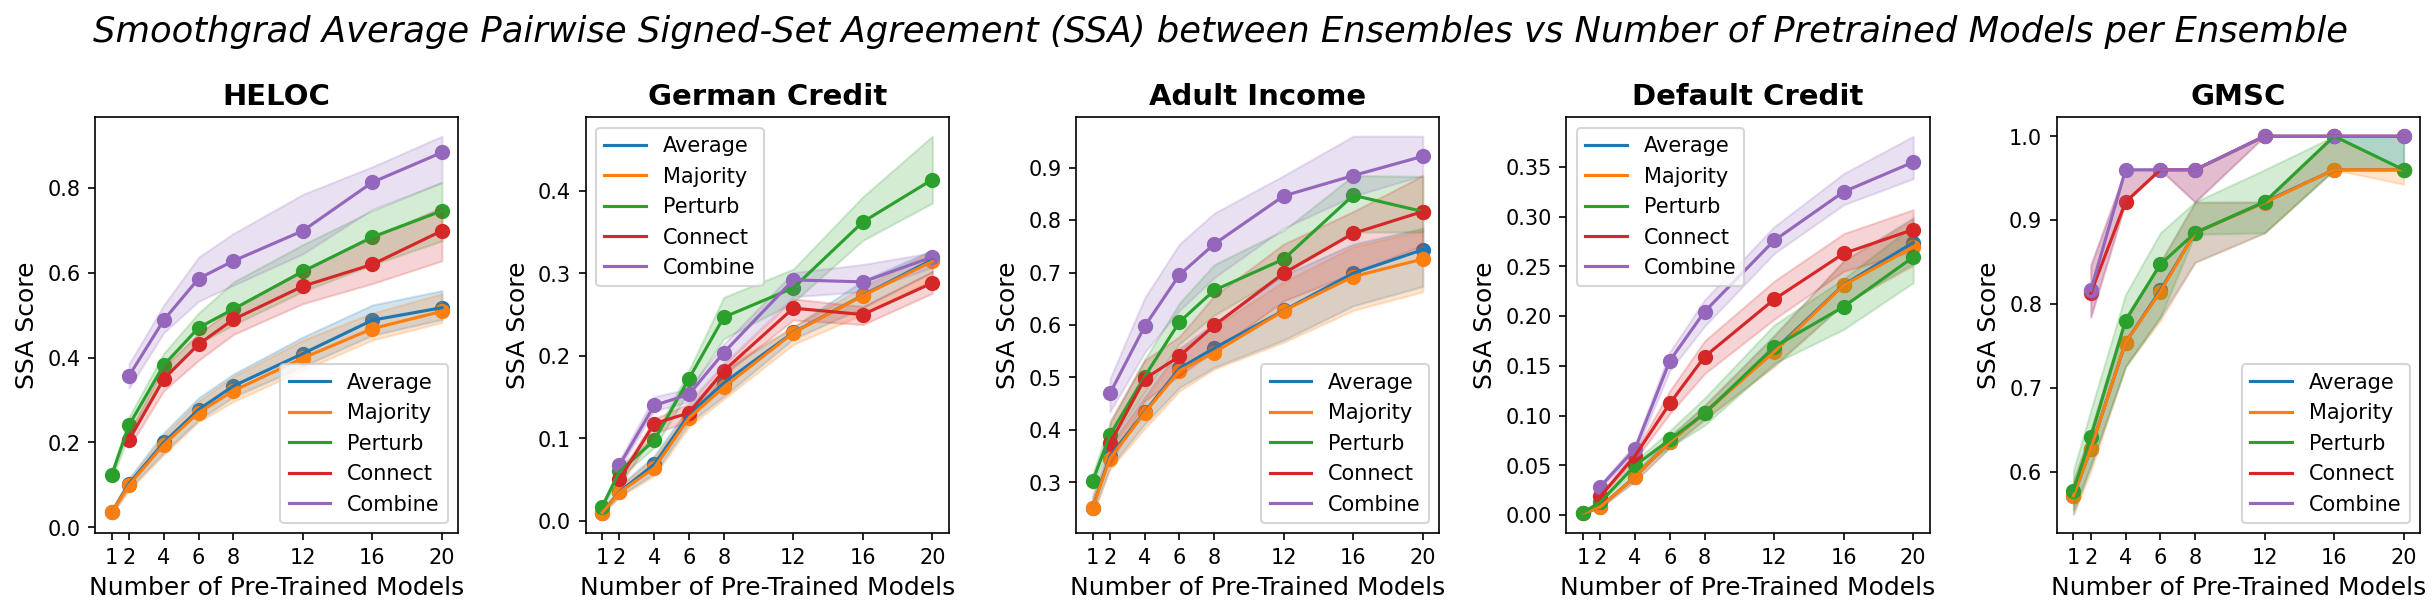

In [23]:
exp = 'smoothgrad'
metric = 'ssa'
k = 5
ensemble_sizes = [[1, 2, 4, 6, 8, 12, 16, 20]]*5
plot_sims(names, directories, ensemble_sizes, k, exp, metric, methods, colors)

### CDC

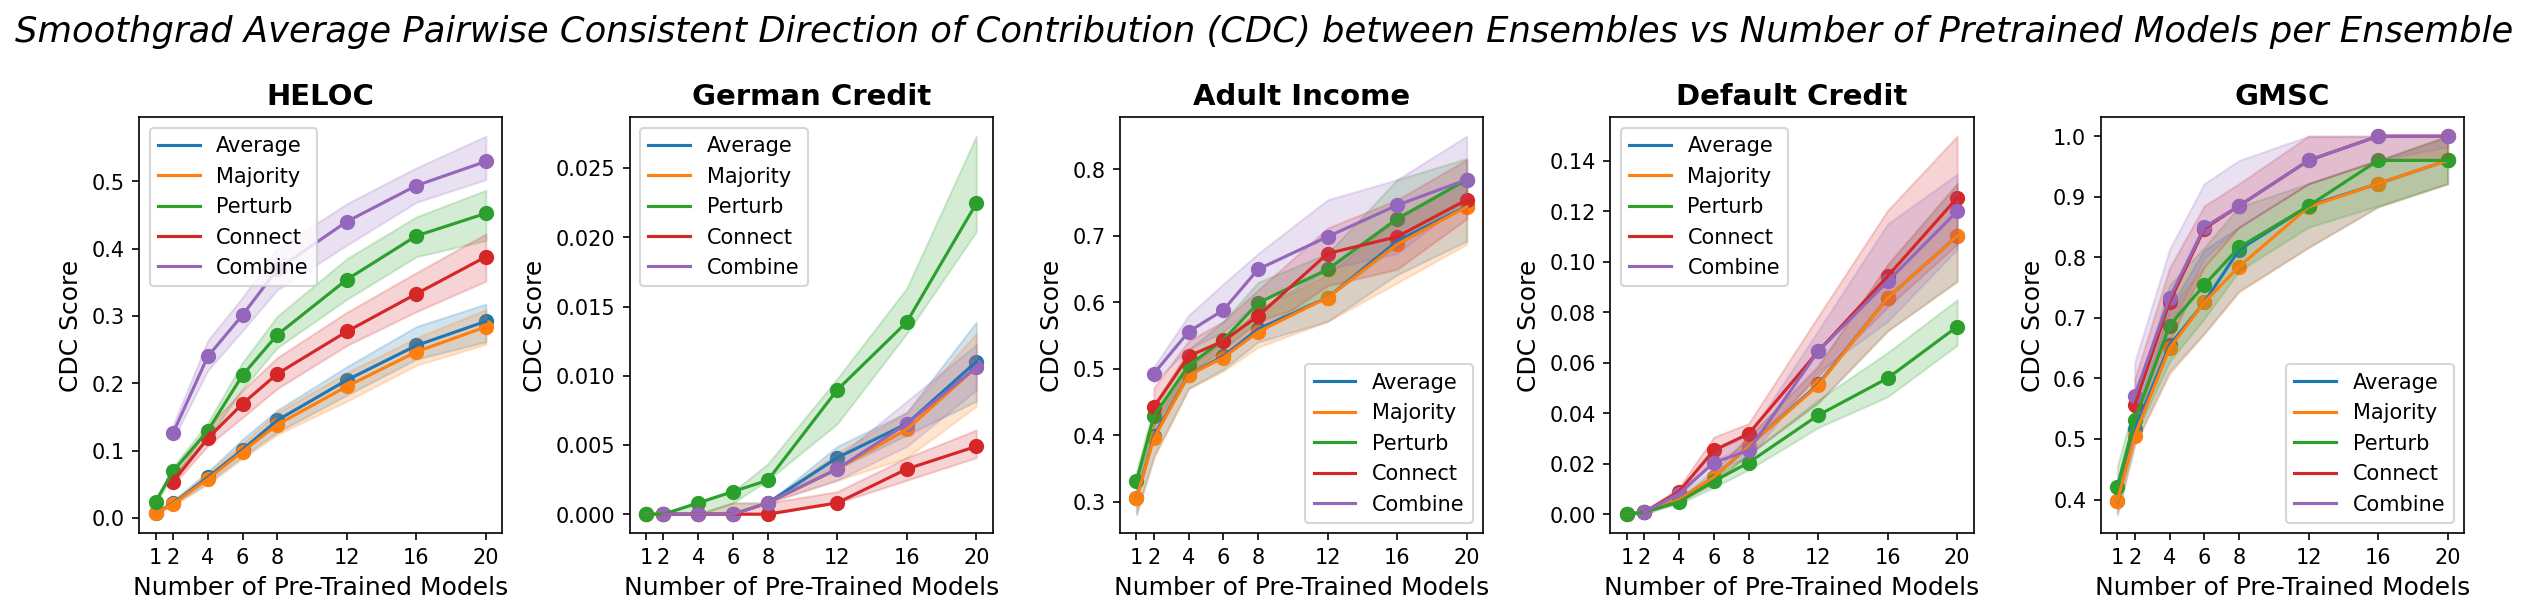

In [28]:
exp = 'smoothgrad'
metric = 'cdc'
k = [23, 70, 6, 90, 10]
ensemble_sizes = [[1, 2, 4, 6, 8, 12, 16, 20]]*5
plot_sims(names, directories, ensemble_sizes, k, exp, metric, methods, colors)